In [206]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neural_network import MLPRegressor 
from sklearn.linear_model import BayesianRidge,ARDRegression 
from sklearn.linear_model import PassiveAggressiveRegressor, HuberRegressor, RANSACRegressor 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import TweedieRegressor, PoissonRegressor, GammaRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor 
from sklearn.linear_model import TheilSenRegressor

#try multiple regressotr in sklean

In [207]:
#obj or instances
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'MLPRegressor': MLPRegressor(),
    'BayesianRidge': BayesianRidge(),
    'ARDRegression': ARDRegression(),
    'PassiveAggressiveRegressor': PassiveAggressiveRegressor(),
    'HuberRegressor': HuberRegressor(),
    'TheilSenRegressor': TheilSenRegressor(),
    'RANSACRegressor': RANSACRegressor(),
    'GaussianProcessRegressor': GaussianProcessRegressor(),
    'TweedieRegressor': TweedieRegressor(),
    'PoissonRegressor': PoissonRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor()
}

In [208]:
import pandas as pd 
data=pd.read_csv('Fish weight prediction - kaggle.csv') #reg predict wieght of fish 
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [209]:
#transform from categoricl to nominal 
data.Species.value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [183]:

#way 1 
#one hot encoding  #then we see which way give us higher acc
pd.get_dummies(data.Species).sample(10).replace({True:1,False:0})


,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
108,0,0,1,0,0,0,0
15,1,0,0,0,0,0,0
155,0,0,0,0,0,1,0
145,0,0,0,0,0,1,0
138,0,0,0,1,0,0,0
137,0,0,0,1,0,0,0
154,0,0,0,0,0,1,0
123,0,0,1,0,0,0,0
39,0,0,0,0,1,0,0
69,0,1,0,0,0,0,0


In [184]:
#to concat it with the origial data 
pd.concat([data,pd.get_dummies(data.Species)],axis=1)

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [185]:
pd.concat([data,pd.get_dummies(data.Species,prefix='Species')],axis=1)#prefix

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [186]:
data=pd.concat([data,pd.get_dummies(data.Species,prefix='Species')],axis=1).drop(columns=['Species'])#drop spicies col 
data

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [210]:
#way 2 
#label encoding
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('Fish weight prediction - kaggle.csv')
le=LabelEncoder()
data.Species=le.fit_transform(data.Species)
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


<Axes: xlabel='Weight'>

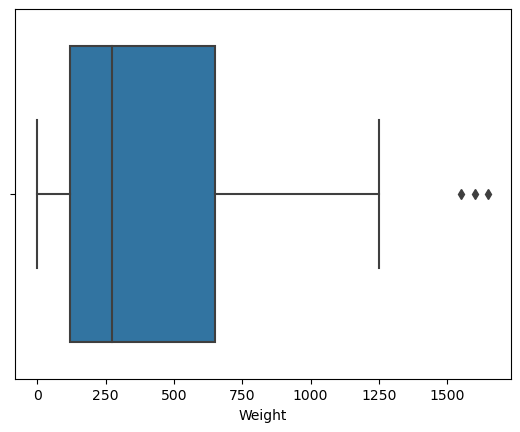

In [211]:
#Outliers
import seaborn as sns
sns.boxplot(x='Weight',data=data)

In [212]:
Q1=data.Weight.quantile(0.25)
Q3=data.Weight.quantile(0.75)
IQR=Q3-Q1
print(IQR)

530.0


In [213]:
data=data[~((data.Weight < (Q1-1.5*IQR)) | (data.Weight > (Q3+1.5*IQR)))]

<Axes: xlabel='Weight'>

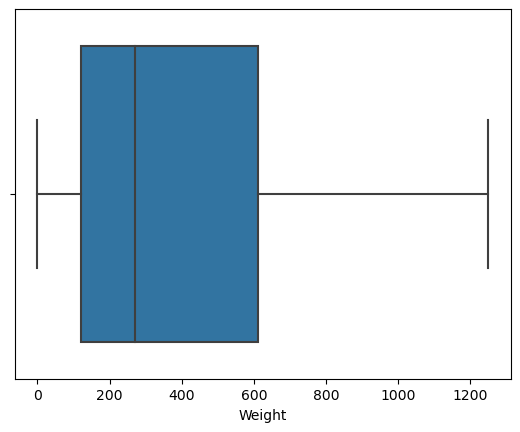

In [214]:
sns.boxplot(x='Weight',data=data)

<Axes: xlabel='Length1'>

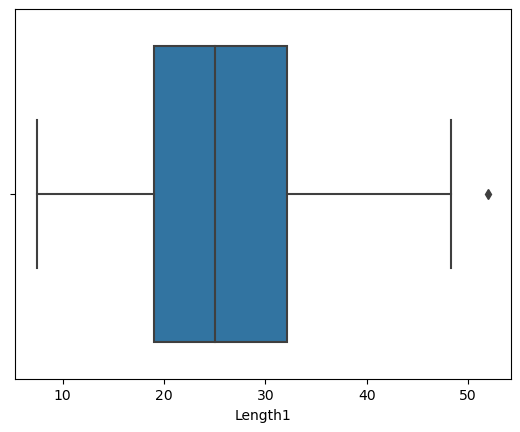

In [215]:
sns.boxplot(x='Length1',data=data)

In [216]:
Q1=data.Length1.quantile(0.25)
Q3=data.Length1.quantile(0.75)
IQR=Q3-Q1
print(IQR)
data=data[~((data.Length1 < (Q1-1.5*IQR)) | (data.Length1 > (Q3+1.5*IQR)))]

13.125


<Axes: xlabel='Length1'>

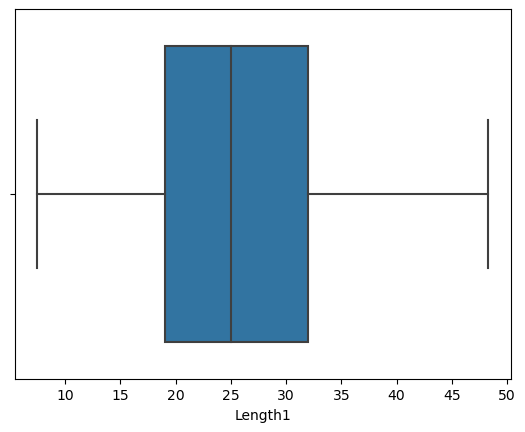

In [217]:
sns.boxplot(x='Length1',data=data)

In [218]:
#one hot encoding 

In [219]:
# dependent &independent variables
x=data.drop(columns=['Weight'])
y=data['Weight']

In [220]:
#taining the model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import time 
import warnings
N=10  #run 10times
acclist=[]
accs=dict()
timelist=[] #check the training time
for c in models:
    acclist=[]
    time_list=[]
    for i in range(N):
        x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
        start=time.time()
        regr=models[c] #instantiation of objs 
        regr.fit(x_train,y_train) #traing the model
        end=time.time()  #after training
        training_time=end-start
        y_pred=regr.predict(x_test) #make predicion 
        acclist.append(r2_score(y_test,y_pred))
        timelist.append(training_time)
    accs[regr]=[np.mean(acclist),np.std(acclist),np.mean(timelist)] #avg 20 train
accs #accurases

#we pick model which gives highest acc (mean acc) and lowest std at the same time 
#The optimal model here is Randomforestregressor

C:\Users\yluja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.781e+04, tolerance: 1.055e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yluja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.565e+04, tolerance: 9.136e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\yluja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.201e+04, toleranc

{LinearRegression(): [0.898110372887502,
  0.014839140170373947,
  0.002041530609130859],
 Ridge(): [0.9003689983690462, 0.0159744416342431, 0.0017220854759216308],
 Lasso(): [0.9063694555371011, 0.013738576717355186, 0.0019265254338582357],
 ElasticNet(): [0.8954478969161037,
  0.013142045710946609,
  0.001885610818862915],
 DecisionTreeRegressor(): [0.9440625097393417,
  0.014753297274397136,
  0.0018105792999267578],
 RandomForestRegressor(): [0.9699596316630554,
  0.01085904866448088,
  0.0190691868464152],
 GradientBoostingRegressor(): [0.9704517744585521,
  0.007665877461324395,
  0.02241823332650321],
 AdaBoostRegressor(): [0.9587303650681462,
  0.011217617305353908,
  0.02548533082008362],
 SVR(): [0.001058970372919843, 0.10388640026505847, 0.022831972440083823],
 KNeighborsRegressor(): [0.9399281122283696,
  0.021326980177696877,
  0.020653052330017088],
 MLPRegressor(): [0.3132780834661729,
  0.14635760599396475,
  0.025234508514404296],
 BayesianRidge(): [0.9036073897711203,

In [176]:
# Convert the accs dictionary into a Pandas DataFrame
df = pd.DataFrame.from_dict(accs, orient='index', columns=['Mean R2', 'Std R2', 'Mean Training Time'])

# Reset the index to have the models as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Model'}, inplace=True)

# Display the DataFrame
print(df)




                                                Model   Mean R2    Std R2  \
0                                  LinearRegression()  0.878342  0.016510   
1                                             Ridge()  0.888021  0.023992   
2                                             Lasso()  0.874027  0.022796   
3                                        ElasticNet()  0.885129  0.022964   
4                             DecisionTreeRegressor()  0.939551  0.036052   
5   (DecisionTreeRegressor(max_features=1.0, rando...  0.960722  0.005887   
6   ([DecisionTreeRegressor(criterion='friedman_ms...  0.972527  0.009705   
7   (DecisionTreeRegressor(max_depth=3, random_sta...  0.943114  0.025182   
8                                               SVR() -0.021225  0.090979   
9                               KNeighborsRegressor()  0.880278  0.047723   
10                                     MLPRegressor()  0.384012  0.073252   
11                                    BayesianRidge()  0.865524  0.038189   

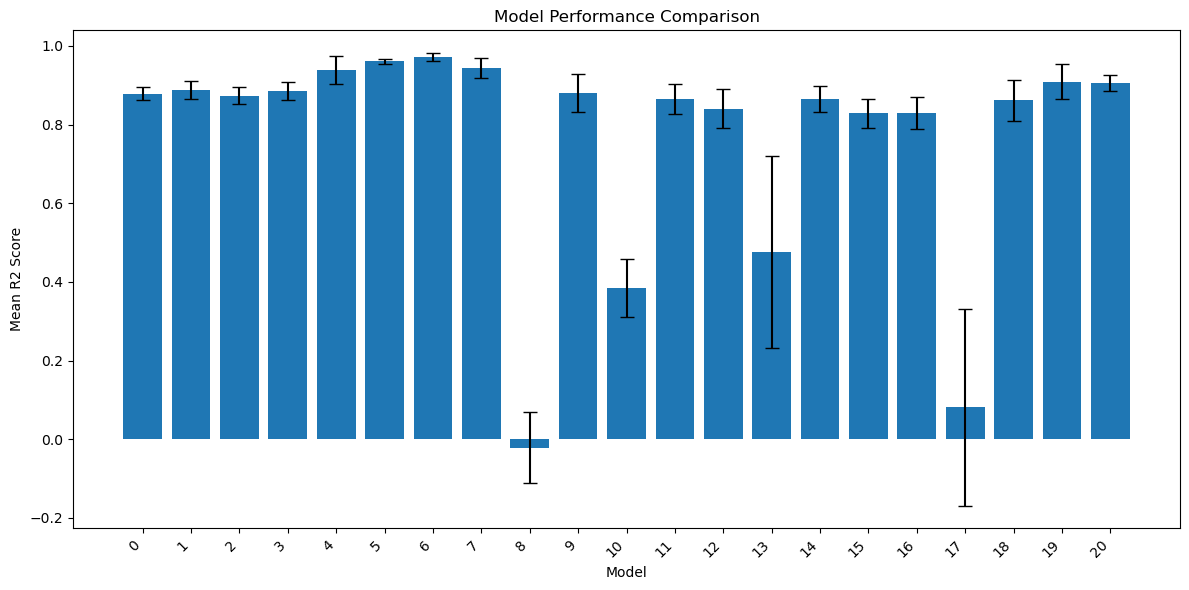

In [205]:
# Ensure that the index is a string for plotting
df.index = df.index.astype(str)

# Create a bar plot of the mean R2 scores
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Mean R2'], yerr=df['Std R2'], capsize=5)
plt.xlabel('Model')
plt.ylabel('Mean R2 Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [1]:
#What are the three main performance factors of any classifier or regressor?
#accuracy :to regressor ->r2-score classifier->accuracy score,stabiliety ->std over multiple runs ,training time

In [223]:
#can the r2 score value of a reg be less than zero if yes does this indicate ?
#yes,that mean the model is bad and gives you random value ..not train well


In [224]:
#what is overfitting problem?
#model learn more than what is needed.. there are columns in model not helpful in prediction

In [148]:
#lets hide warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.resetwarnings()